# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

[-180.          -90.          136.83676759  -95.18159659    0.
  -96.00900596    0.           40.87936219   31.02458614  133.15238973
 -180.         -133.15238973  -31.02458614  -40.87936219   -0.
   96.00900596   -0.           95.18159659 -136.83676759   90.        ]


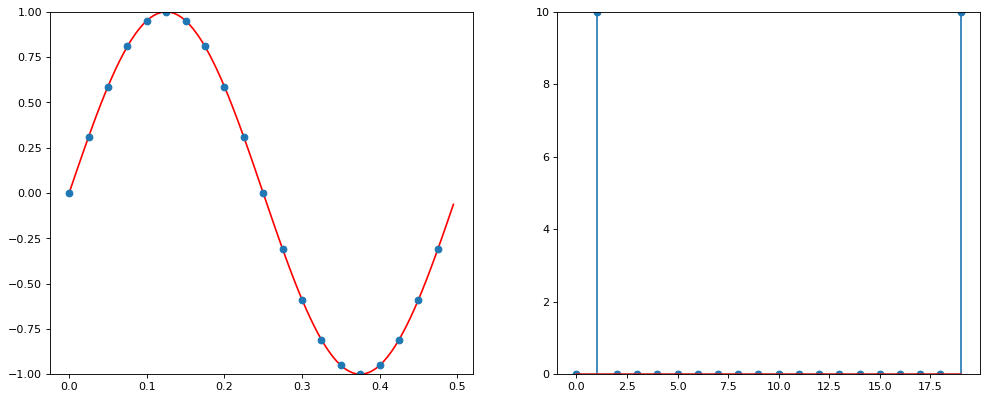

In [103]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*np.sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft.fft(signal)

# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

[-180.          -90.          136.83676759  -95.18159659    0.
  -96.00900596    0.           40.87936219   31.02458614  133.15238973
 -180.         -133.15238973  -31.02458614  -40.87936219   -0.
   96.00900596   -0.           95.18159659 -136.83676759   90.        ]


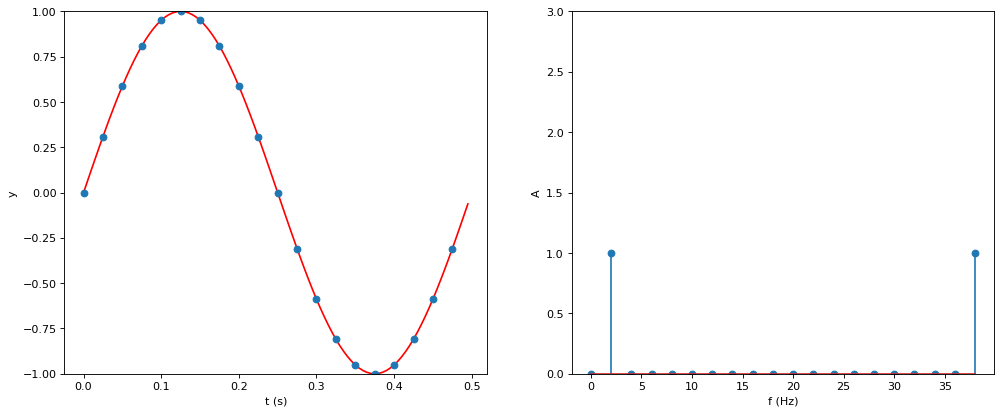

In [106]:
# Zdefiniuj funckję
def plott(A = 1, LP = 1, w = 40, f = 2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*np.sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    xlabel("t (s)")
    ylabel("y")
    ax.plot(t, signal, 'o')

    signal1 = fft.fft(signal)
    print(np.angle(signal1, deg=True))
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu
    signal1 = [i/(T*LP/TW/2) for i in signal1]
    signal1[0]=signal1[0]/2

    freqs = range(int(n))
    freqs = [i/int(n)*w for i in freqs]


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    xlabel("f (Hz)")
    ylabel("A")
    stem(freqs, signal1, '-*')

    show()
plott()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [10]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

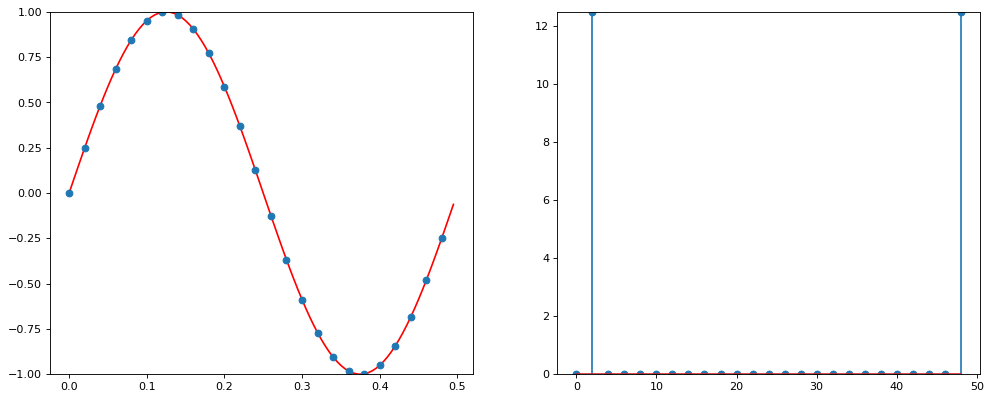

In [14]:
# w=50
plott(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

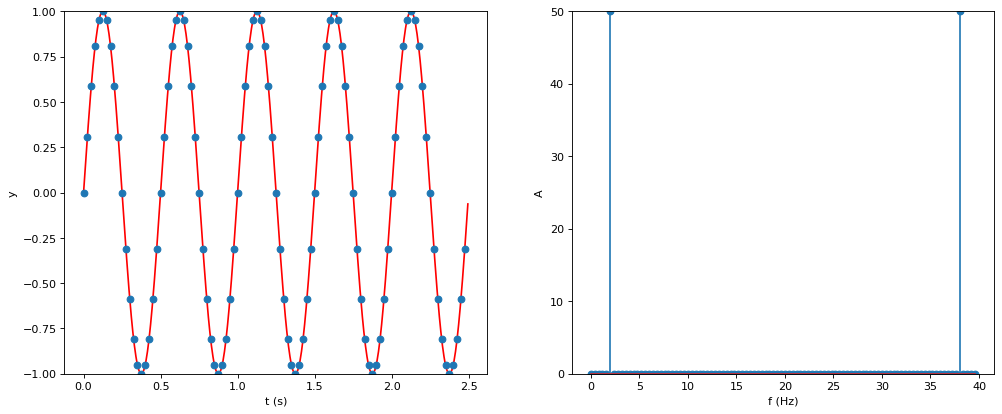

In [26]:
# popraw oś OX
plott(LP=5)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

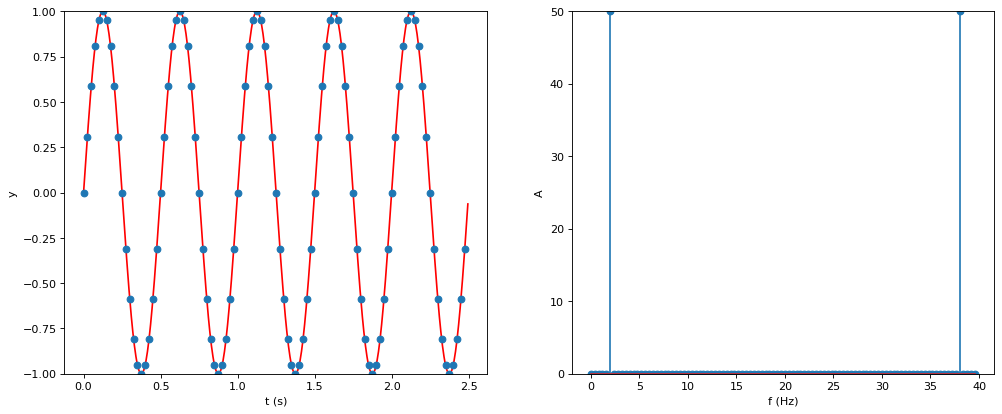

In [27]:
# Podpisz osie wykresów
plott(LP=5)

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

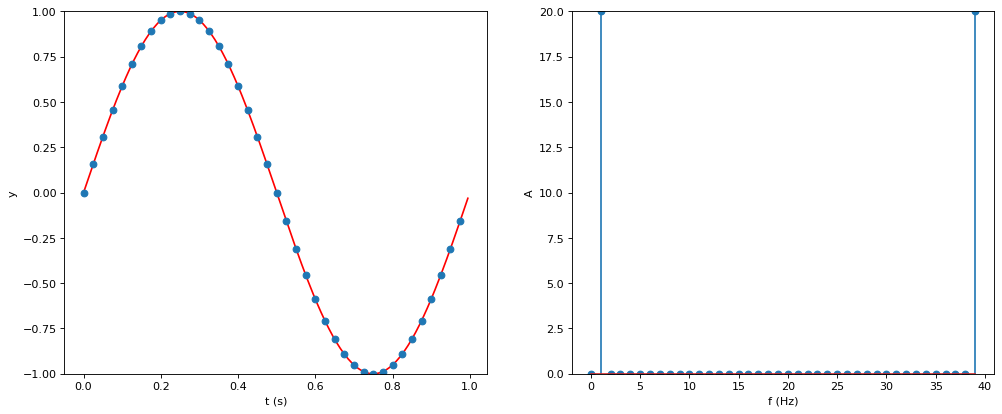

In [28]:
# f=1, A=1, LP=1
plott(f=1, A=1, LP=1)

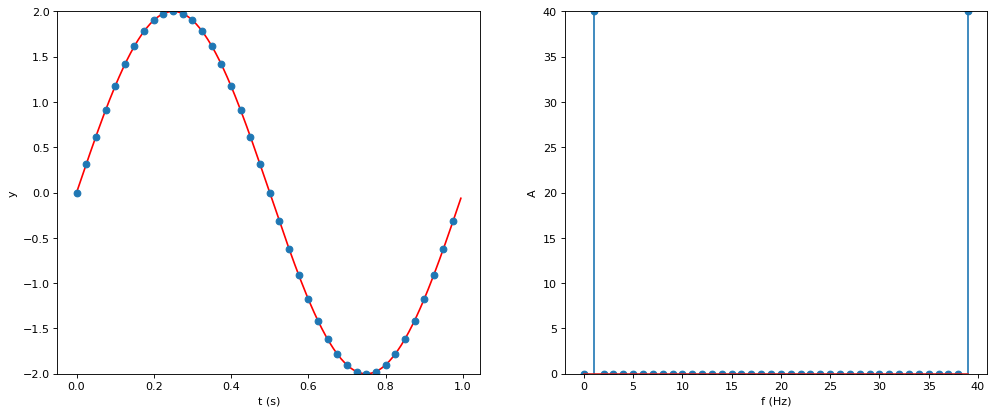

In [30]:
# f=1, A=2, LP=1
plott(f=1, A=2, LP=1)

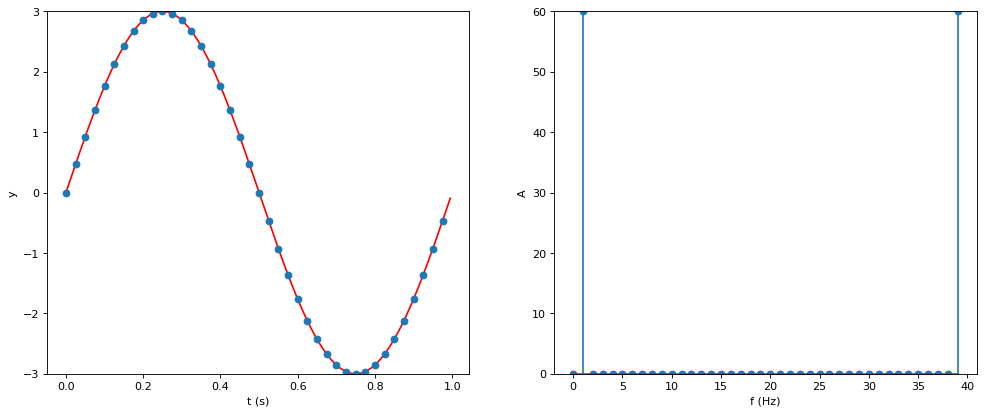

In [29]:
# f=1, A=3, LP=1
plott(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

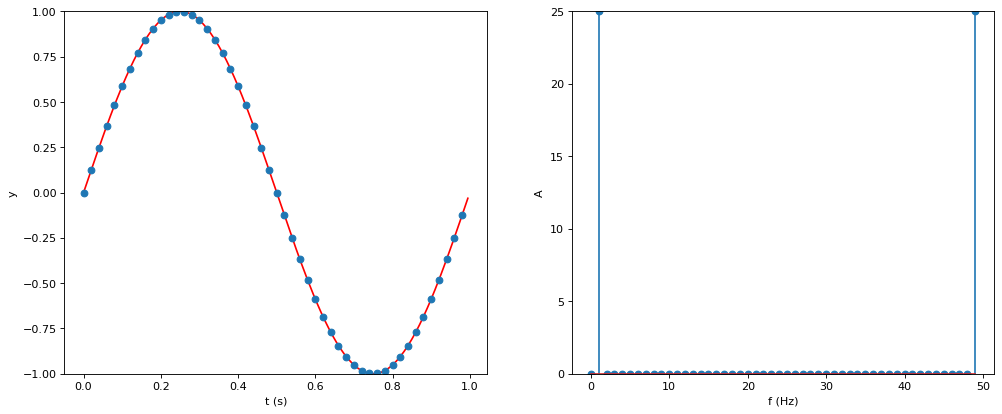

In [31]:
# f=1, w=50, LP=1
plott(f=1, w=50, LP=1)

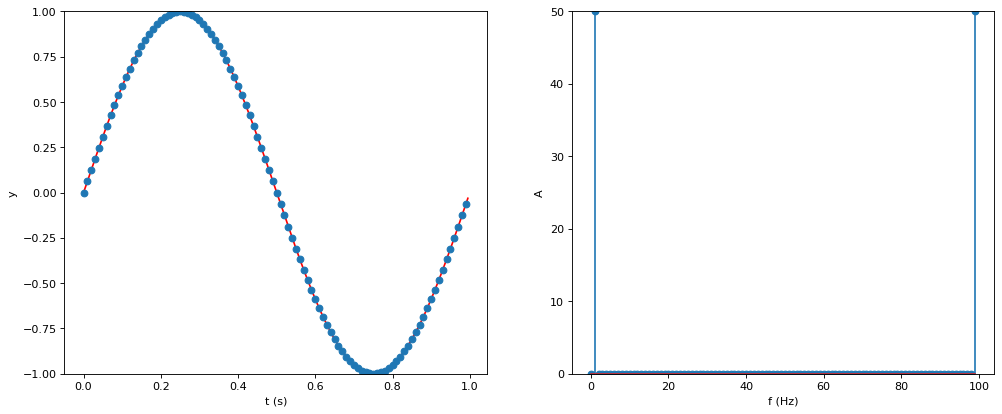

In [32]:
# f=1, w=100, LP=1
plott(f=1, w=100, LP=1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

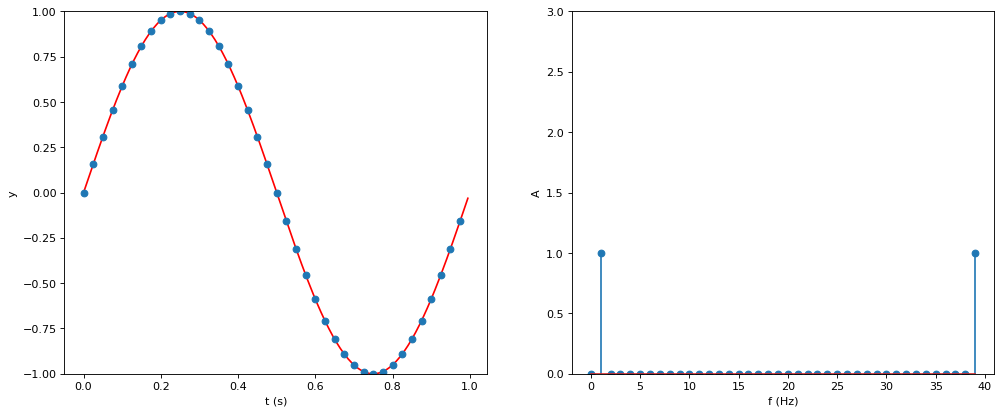

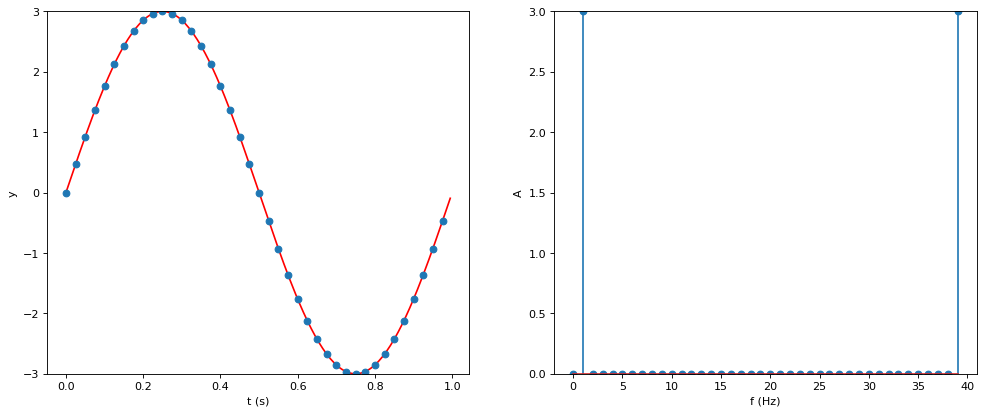

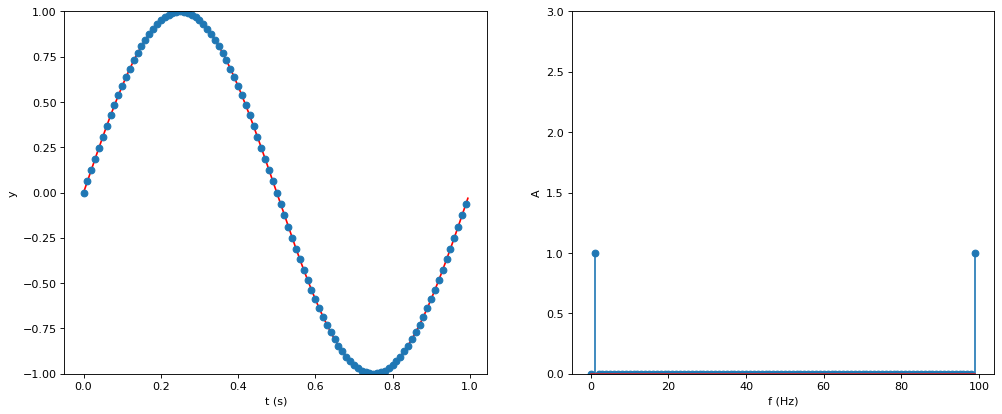

In [41]:
# popraw oś OY
plott(f=1, A=1, LP=1)
plott(f=1, A=3, LP=1)
plott(f=1, w=100, LP=1)

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

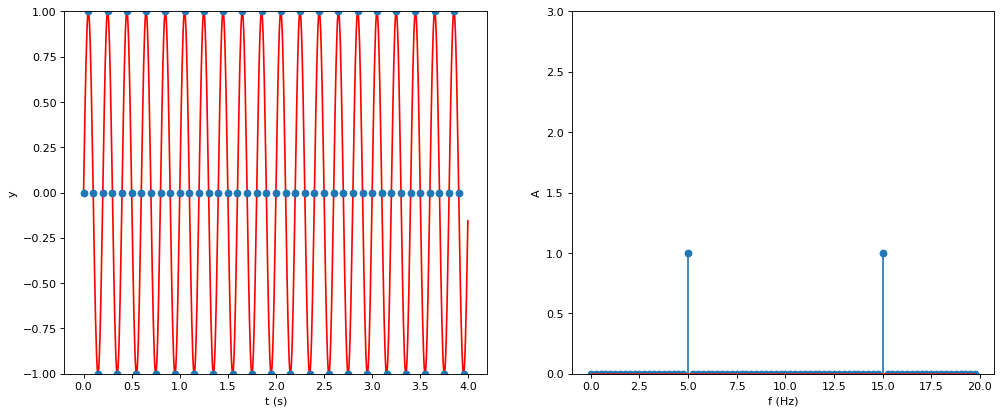

In [42]:
# f=5, w=20, LP=20
plott(f=5, w=20, LP=20)

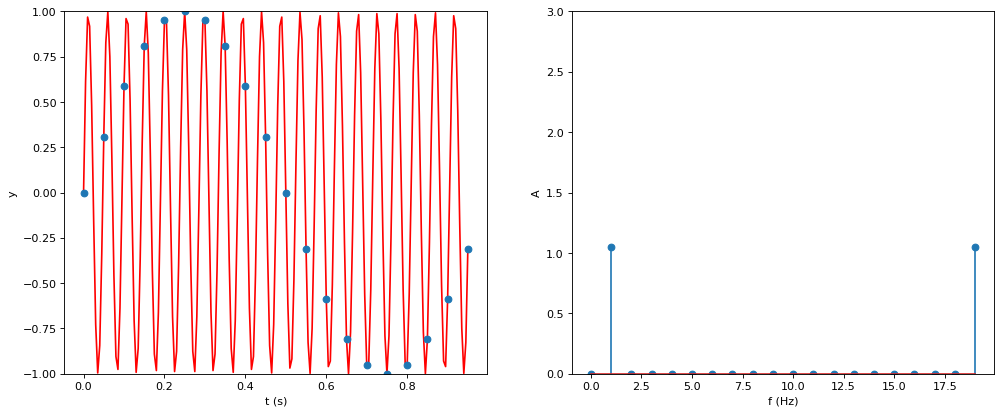

In [43]:
# f=21, w=20, LP=20
plott(f=21, w=20, LP=20)
#uzyskano wynik 1Hz, z powodu za małej ilości próbek

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

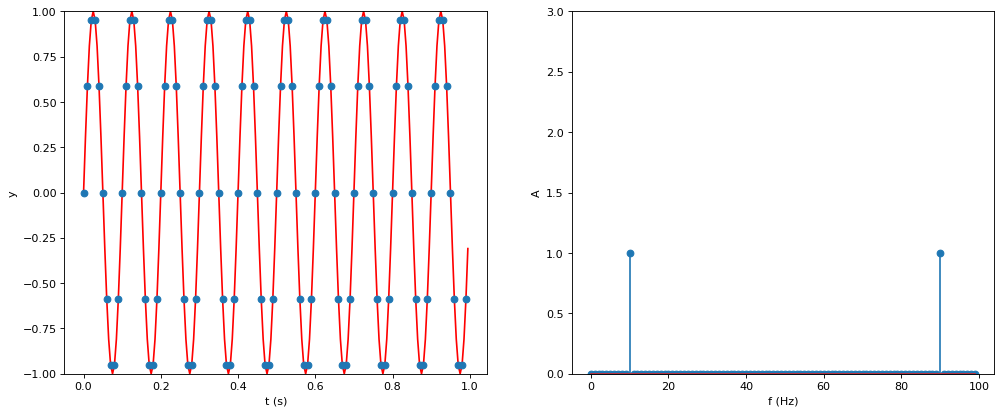

In [44]:
# f=10, w=100, A=1, LP=10
plott(f=10, w=100, LP=10)
#Uzyskano 10Hz i jest to poprawne

ii) $sin(2*pi*t*f)$, $f=20Hz$

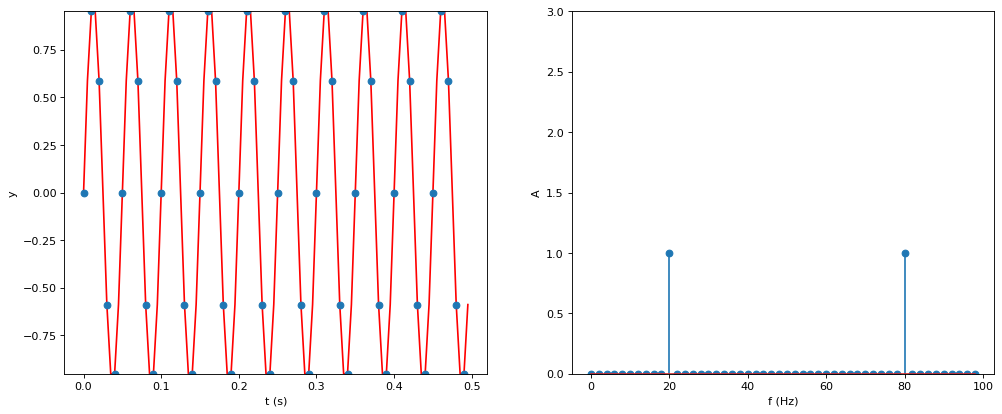

In [45]:
# f=20, w=100, A=1, LP=10
plott(f=20, w=100, LP=10)
#Uzyskano wynik 20Hz i jest to poprawne

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33 ]
[ 0.00000000e+00  8.09016994e-01  9.51056516e-01  3.09016994e-01
 -5.87785252e-01 -1.00000000e+00 -5.87785252e-01  3.09016994e-01
  9.51056516e-01  8.09016994e-01  3.67394040e-16 -8.09016994e-01
 -9.51056516e-01 -3.09016994e-01  5.87785252e-01  1.00000000e+00
  5.87785252e-01 -3.09016994e-01 -9.51056516e-01 -8.09016994e-01
 -7.34788079e-16  8.09016994e-01  9.51056516e-01  3.09016994e-01
 -5.87785252e-01 -1.00000000e+00 -5.87785252e-01  3.09016994e-01
  9.51056516e-01  8.09016994e-01  1.10218212e-15 -8.09016994e-01
 -9.51056516e-01 -3.09016994e-01  5.87785252e-01  1.00000000e+00
  5.87

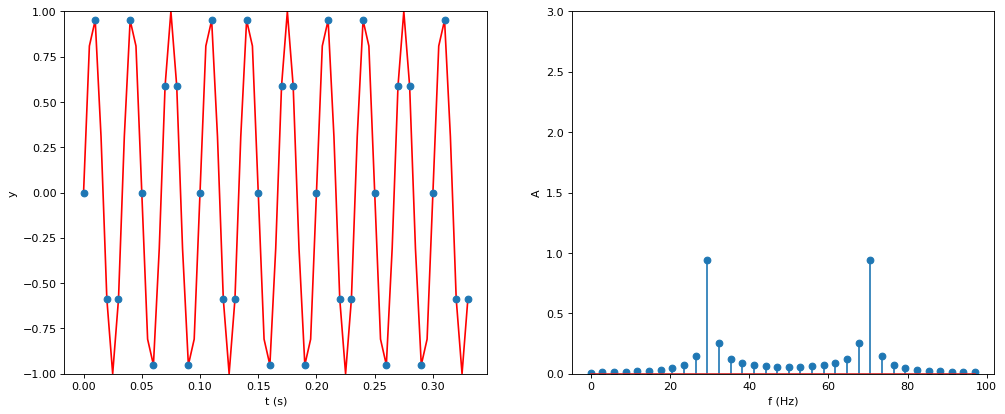

In [73]:
# f=30, w=100, A=1, LP=10
plott(f=30, w=100, LP=10)
#Niedokładność wynika z floata

iv) $sin(2*pi*t*f)$, $f=40Hz$

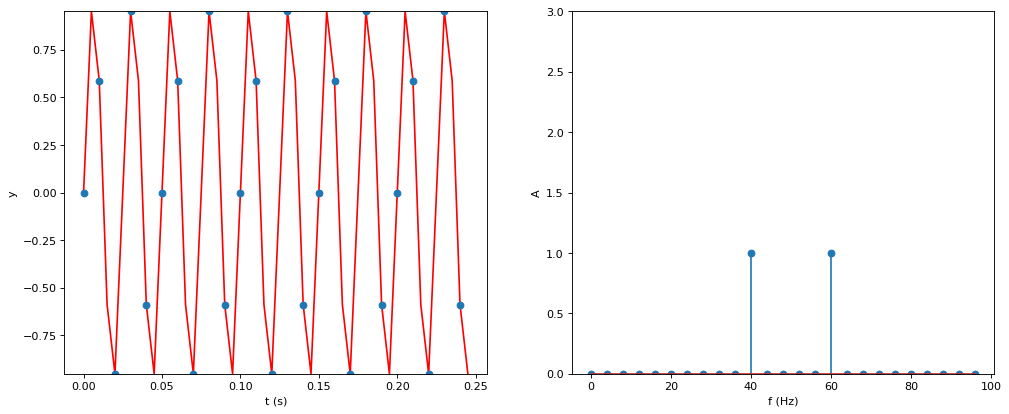

In [48]:
# f=40, w=100, A=1, LP=10
plott(f=40, w=100, LP=10)
#Wynik wynosi 40Hz i jest poprawny

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195]
[ 0.00000000e+00  1.00000000e+00 -3.21624530e-16 -1.00000000e+00
  6.43249060e-16  1.00000000e+00  3.67394040e-16 -1.00000000e+00
  1.28649812e-15  1.00000000e+00  6.12323400e-16 -1.00000000e+00
 -7.34788079e-16  1.00000000e+00 -2.69546092e-15 -1.00000000e+00
  2.57299624e-15  1.00000000e+00  1.10218212e-15 -1.00000000e+00
 -1.22464680e-15  1.00000000e+00  4.89982516e-15 -1.00000000e+00
 -1.46957616e-15  1.00000000e+00 -1.96067284e-15 -1.00000000e+00
  5.39092184e-15  1.00000000e+00  5.38968388e-15 -1.00000000e+00
  5.14599248e-15  1.00000000e+00 -8.57624148e-15 -1.00000000e+00
 -2.20436424e-15  1.00000000e+00  5.87954260e-15 -1.00000000e+00]


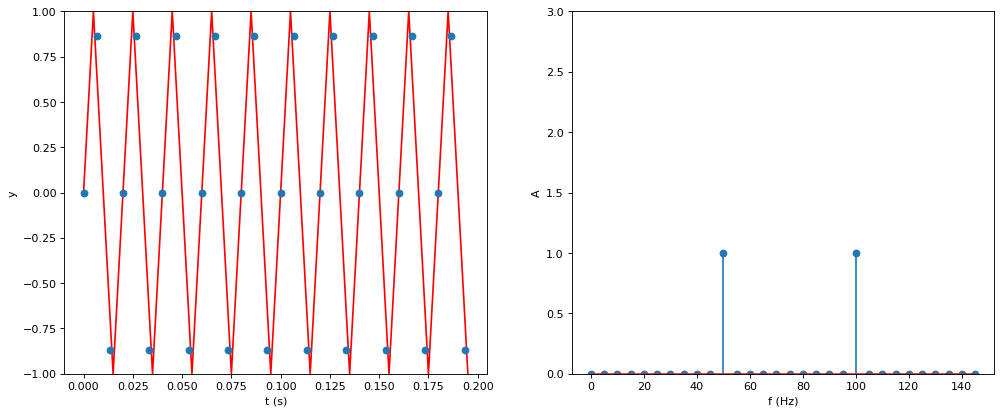

In [76]:
# f=50, w=100, A=1, LP=10
plott(f=50, w=150, LP=10)
#Wynik nie jest poprawny

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?


In [ ]:
#twierdzenie Nyquista–Shannona

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

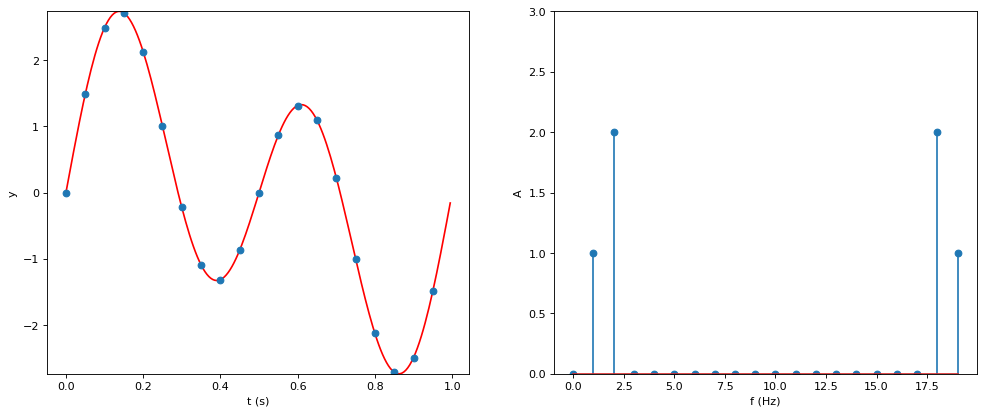

In [81]:
# Wyrysuj sygnał
def plott2(LP = 1, w = 40, f = 2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : np.sin(2*pi*t*f)+2*np.sin(4*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    xlabel("t (s)")
    ylabel("y")
    ax.plot(t, signal, 'o')

    signal1 = fft.fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu
    signal1 = [i/(T*LP/TW/2) for i in signal1]
    signal1[0]=signal1[0]/2

    freqs = range(int(n))
    freqs = [i/int(n)*w for i in freqs]


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    xlabel("f (Hz)")
    ylabel("A")
    stem(freqs, signal1, '-*')

    show()
plott2(f=1, w=20)

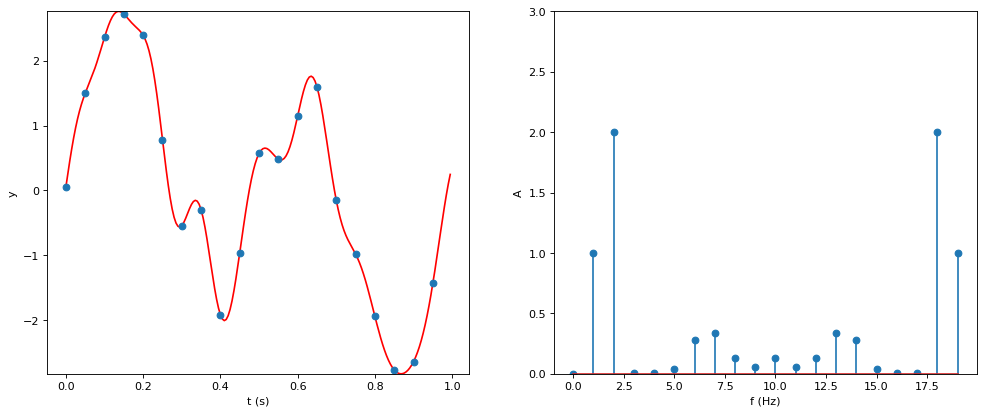

In [97]:
def plott3(LP = 1, w = 40, f = 2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : np.sin(2*pi*t*f)+2*np.sin(4*pi*t*f)    
    # def. funkcji (tutaj sinus)
    tab=[]
    for i in range(100):
        tab.append([random.uniform(0.02, 0.08), random.uniform(5.0, 10.0), random.uniform(0, 2*pi)])
    randFUNC = lambda t, A, f, fi: A*np.sin(2*pi*t*f+fi)
    signal = FUNC(t)
    for i in tab:
        signal += randFUNC(t, i[0], i[1], i[2])
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    for i in tab:
        base_signal += randFUNC(base_t, i[0], i[1], i[2])
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    xlabel("t (s)")
    ylabel("y")
    ax.plot(t, signal, 'o')

    signal1 = fft.fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu
    signal1 = [i/(T*LP/TW/2) for i in signal1]
    signal1[0]=signal1[0]/2

    freqs = range(int(n))
    freqs = [i/int(n)*w for i in freqs]


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    xlabel("f (Hz)")
    ylabel("A")
    stem(freqs, signal1, '-*')

    show()
plott3(f=1, w=20)
#Szum raczej nie ma aplitudy większej niż 0,5.

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

[  -0.          -90.          139.35045585  -99.14934335   90.
  -90.            7.12501635   31.22812339   19.62127614  131.18592517
   -0.         -131.18592517  -19.62127614  -31.22812339   -7.12501635
   90.          -90.           99.14934335 -139.35045585   90.        ]


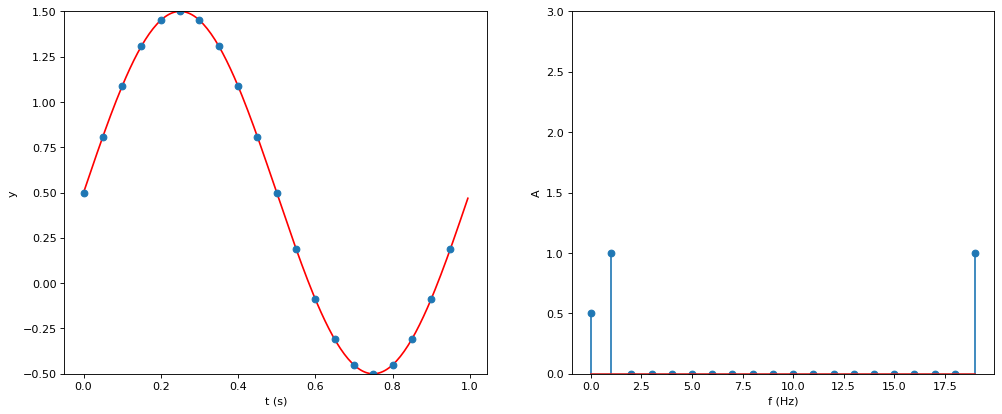

In [109]:
# Wyrysuj sygnał
def plottt(A = 1, LP = 1, w = 40, f = 2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t :0.5+ A*np.sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    xlabel("t (s)")
    ylabel("y")
    ax.plot(t, signal, 'o')

    signal1 = fft.fft(signal)
    print(np.angle(signal1, deg=True))
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu
    signal1 = [i/(T*LP/TW/2) for i in signal1]
    signal1[0]=signal1[0]/2

    freqs = range(int(n))
    freqs = [i/int(n)*w for i in freqs]


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    xlabel("f (Hz)")
    ylabel("A")
    stem(freqs, signal1, '-*')

    show()
plottt(f=1, w=20)
#trzeba dla pierwszego elementu dodatkowo podzielić przez 2 ze względu dublowania się przez symetrię.

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

[-180.          -90.          136.83676759  -95.18159659    0.
  -96.00900596    0.           40.87936219   31.02458614  133.15238973
 -180.         -133.15238973  -31.02458614  -40.87936219   -0.
   96.00900596   -0.           95.18159659 -136.83676759   90.        ]


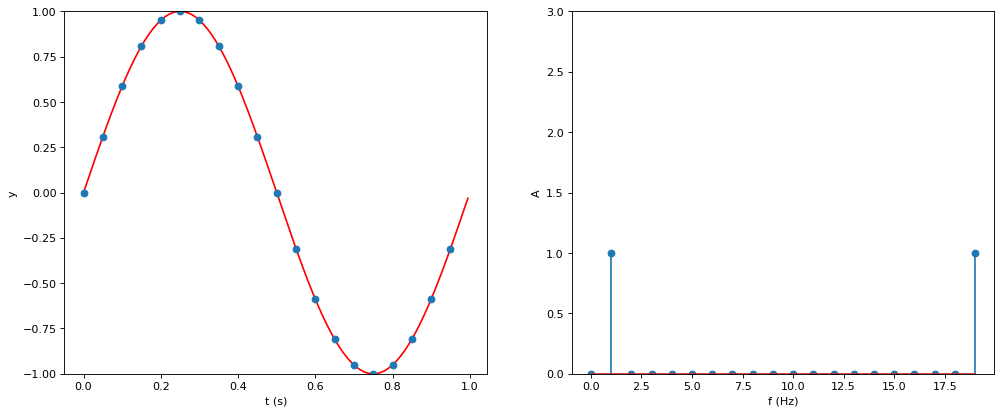

In [107]:
# faza = 0
plott(f=1, w=20)

[-180.          -45.          115.75060489 -154.08937024  180.
  -80.53767779    0.            7.18277214   51.97889036   90.
 -180.          -90.          -51.97889036   -7.18277214   -0.
   80.53767779 -180.          154.08937024 -115.75060489   45.        ]


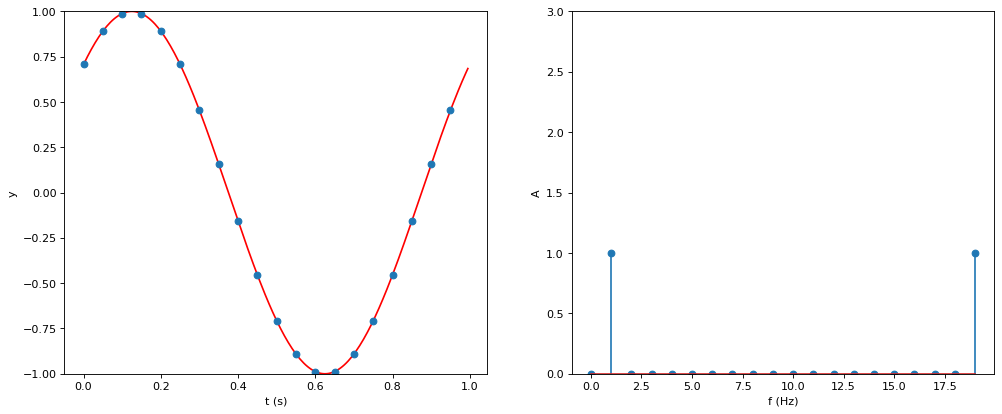

In [108]:
# faza = pi/4
def plottt(A = 1, LP = 1, w = 40, f = 2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*np.sin(2*pi*t*f+pi/4)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    xlabel("t (s)")
    ylabel("y")
    ax.plot(t, signal, 'o')

    signal1 = fft.fft(signal)
    print(np.angle(signal1, deg=True))
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu
    signal1 = [i/(T*LP/TW/2) for i in signal1]
    signal1[0]=signal1[0]/2

    freqs = range(int(n))
    freqs = [i/int(n)*w for i in freqs]


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    xlabel("f (Hz)")
    ylabel("A")
    stem(freqs, signal1, '-*')

    show()
plottt(f=1, w=20)

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [63]:
# wygeneruj wektor x
x = random.random(10)

In [67]:
# oblicz fft z x
f1 = fft.fft(x)

In [70]:
# oblicz ifft
f2 = fft.ifft(f1)

In [71]:
#porownaj x z ifft(fft(x)), wystarczy print
print(f1)
print(f2)

[ 4.12124293-0.j          0.99217347+0.0469333j   0.22120979-0.0142321j
  0.22378714-0.28693553j -0.1260291 -0.36155746j -1.73189688-0.j
 -0.1260291 +0.36155746j  0.22378714+0.28693553j  0.22120979+0.0142321j
  0.99217347-0.0469333j ]
[0.50116287+0.j 0.86035545+0.j 0.11070549+0.j 0.54106298+0.j
 0.13014213+0.j 0.361158  +0.j 0.12244152+0.j 0.49218159+0.j
 0.33022103+0.j 0.67181189+0.j]
